Fonte:

https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [1]:
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


<Axes: >

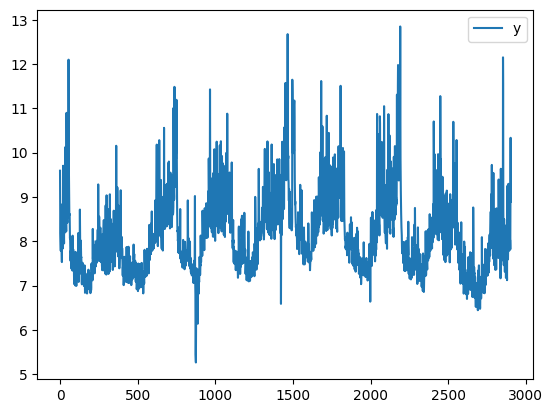

In [3]:
df.plot()

In [4]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))
holidays

,holiday,ds,lower_window,upper_window
0,playoff,2008-01-13,0,1
1,playoff,2009-01-03,0,1
2,playoff,2010-01-16,0,1
3,playoff,2010-01-24,0,1
4,playoff,2010-02-07,0,1
5,playoff,2011-01-08,0,1
6,playoff,2013-01-12,0,1
7,playoff,2014-01-12,0,1
8,playoff,2014-01-19,0,1
9,playoff,2014-02-02,0,1


In [5]:
m = Prophet(holidays=holidays)
m.add_country_holidays(country_name='US')
m.fit(df)

15:50:11 - cmdstanpy - INFO - Chain [1] start processing
15:50:11 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
m.train_holiday_names

0                         playoff
1                       superbowl
2                  New Year's Day
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Veterans Day
7                    Thanksgiving
8                   Christmas Day
9        Christmas Day (observed)
10     Martin Luther King Jr. Day
11          Washington's Birthday
12                   Columbus Day
13        Veterans Day (observed)
14    Independence Day (observed)
15      New Year's Day (observed)
dtype: object

In [8]:
future = m.make_future_dataframe(periods=365)
future

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
...,...
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18


In [9]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.048358,8.244047,9.436462,8.048358,8.048358,0.0,0.0,0.0,0.0,...,0.341488,0.341488,0.341488,0.462769,0.462769,0.462769,0.0,0.0,0.0,8.852616
1,2007-12-11,8.046737,8.020695,9.229505,8.046737,8.046737,0.0,0.0,0.0,0.0,...,0.130325,0.130325,0.130325,0.450106,0.450106,0.450106,0.0,0.0,0.0,8.627167
2,2007-12-12,8.045115,7.840991,9.010253,8.045115,8.045115,0.0,0.0,0.0,0.0,...,-0.057298,-0.057298,-0.057298,0.438778,0.438778,0.438778,0.0,0.0,0.0,8.426596
3,2007-12-13,8.043494,7.831016,9.004783,8.043494,8.043494,0.0,0.0,0.0,0.0,...,-0.056250,-0.056250,-0.056250,0.429103,0.429103,0.429103,0.0,0.0,0.0,8.416346
4,2007-12-14,8.041872,7.801167,8.997133,8.041872,8.041872,0.0,0.0,0.0,0.0,...,-0.055856,-0.055856,-0.055856,0.421341,0.421341,0.421341,0.0,0.0,0.0,8.407357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2017-01-15,7.208377,7.309749,8.670843,6.813688,7.555015,0.0,0.0,0.0,0.0,...,0.012177,0.012177,0.012177,0.778618,0.778618,0.778618,0.0,0.0,0.0,7.999172
3266,2017-01-16,7.207395,8.157965,9.568188,6.809642,7.555844,0.0,0.0,0.0,0.0,...,0.341488,0.341488,0.341488,0.797761,0.797761,0.797761,0.0,0.0,0.0,8.831482
3267,2017-01-17,7.206413,7.398370,8.828526,6.806380,7.556694,0.0,0.0,0.0,0.0,...,0.130325,0.130325,0.130325,0.817806,0.817806,0.817806,0.0,0.0,0.0,8.154544
3268,2017-01-18,7.205430,7.279837,8.715065,6.803972,7.557492,0.0,0.0,0.0,0.0,...,-0.057298,-0.057298,-0.057298,0.838539,0.838539,0.838539,0.0,0.0,0.0,7.986672


In [10]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Christmas Day', 'Christmas Day_lower', 'Christmas Day_upper',
       'Christmas Day (observed)', 'Christmas Day (observed)_lower',
       'Christmas Day (observed)_upper', 'Columbus Day', 'Columbus Day_lower',
       'Columbus Day_upper', 'Independence Day', 'Independence Day_lower',
       'Independence Day_upper', 'Independence Day (observed)',
       'Independence Day (observed)_lower',
       'Independence Day (observed)_upper', 'Labor Day', 'Labor Day_lower',
       'Labor Day_upper', 'Martin Luther King Jr. Day',
       'Martin Luther King Jr. Day_lower', 'Martin Luther King Jr. Day_upper',
       'Memorial Day', 'Memorial Day_lower', 'Memorial Day_upper',
       'New Year's Day', 'New Year's Day_lower', 'New Year's Day_upper',
       'New Year's Day (observed)', 'New Year's Day (observed)_lower',
       'New Year's Day (observed)_upper', 'Thanksgiving', 'Thanksgiving_lower',
       'Thanksgiv

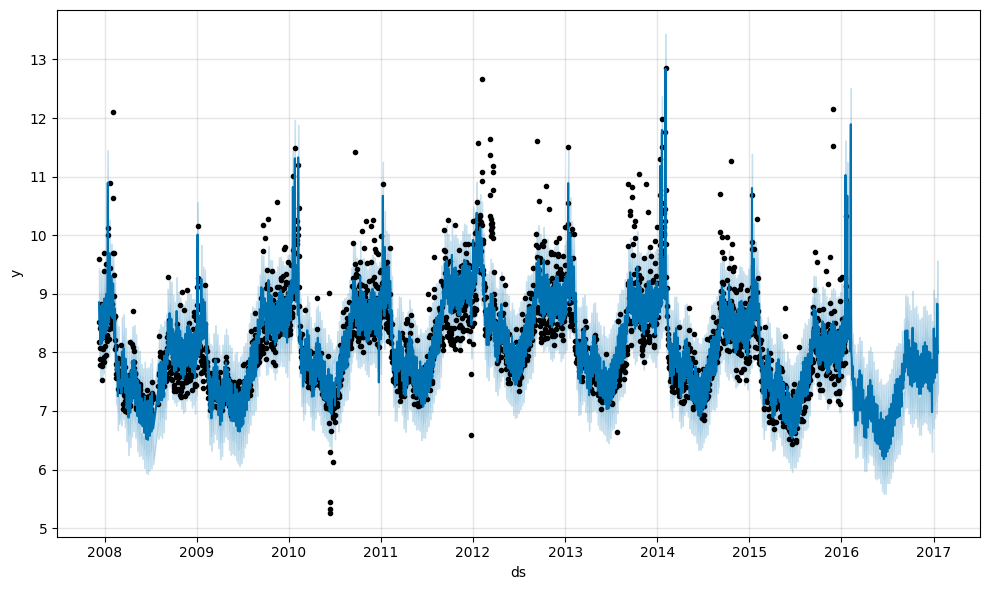

In [11]:
fig1 = m.plot(forecast)

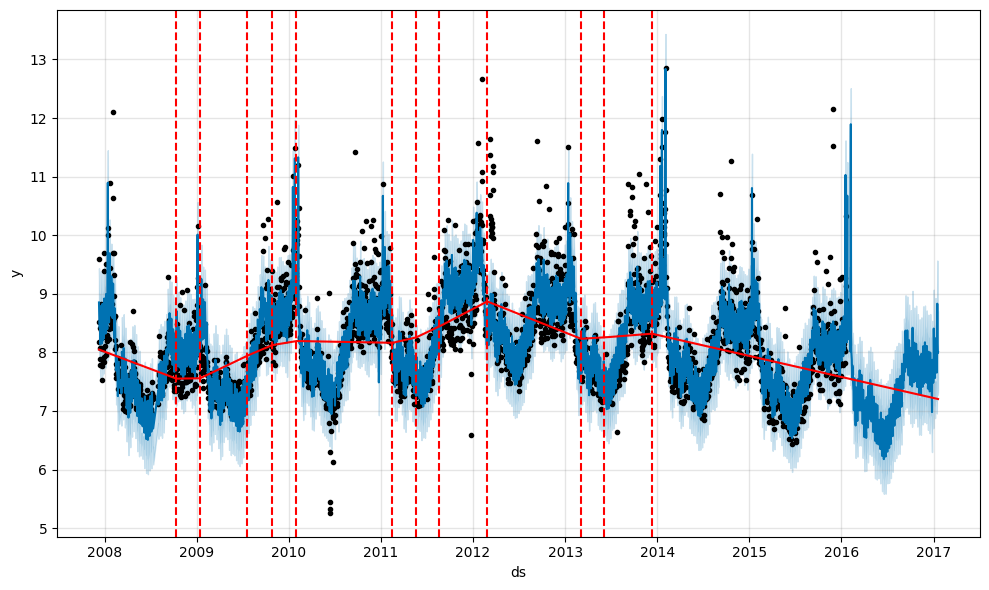

In [12]:
fig_cp = m.plot(forecast)
a = add_changepoints_to_plot(fig_cp.gca(), m, forecast)

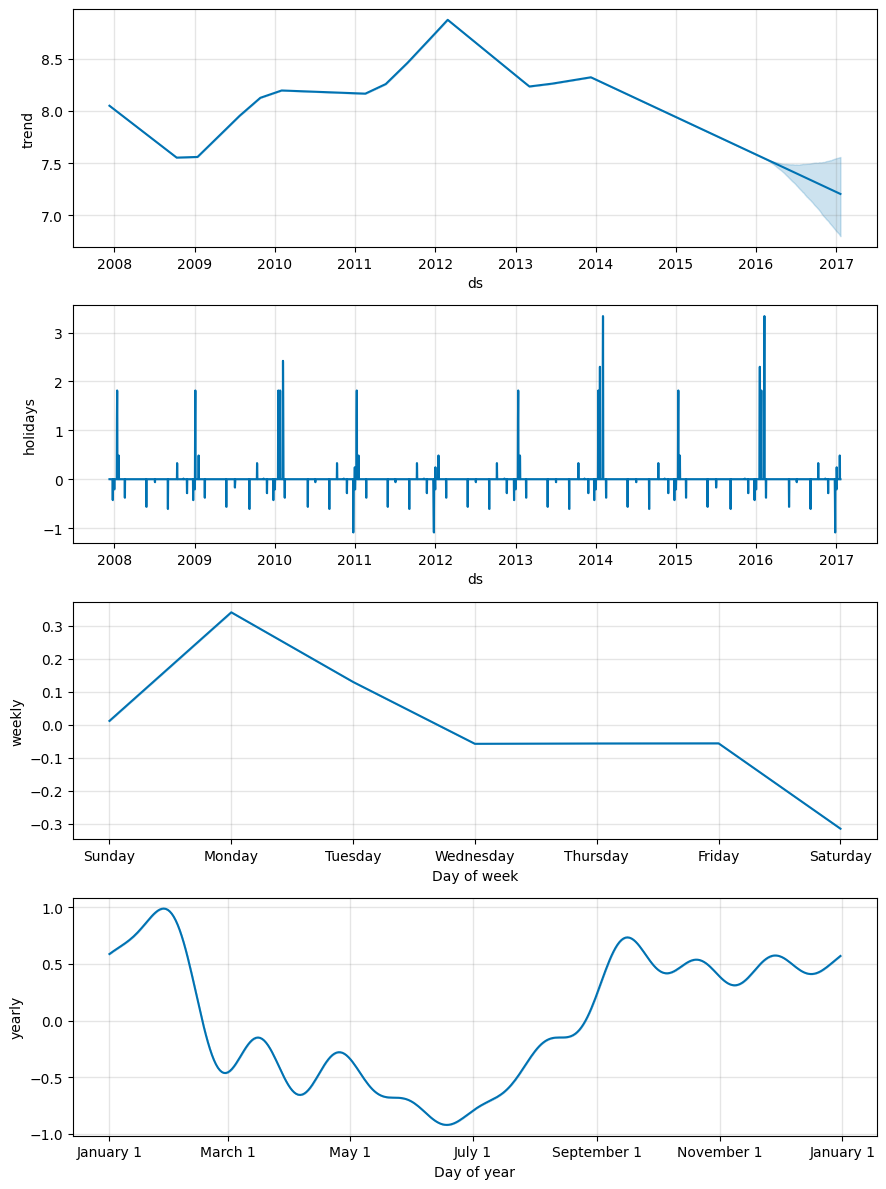

In [13]:
fig2 = m.plot_components(forecast)